<a href="https://colab.research.google.com/github/Jana-ekram/AI-Project/blob/main/Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:  Yara Shoukri

ID:    55-2433

Tutorial:  T-4

---

Name:  Jana Ekram

ID:   55-2243

Tutorial: T-4

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

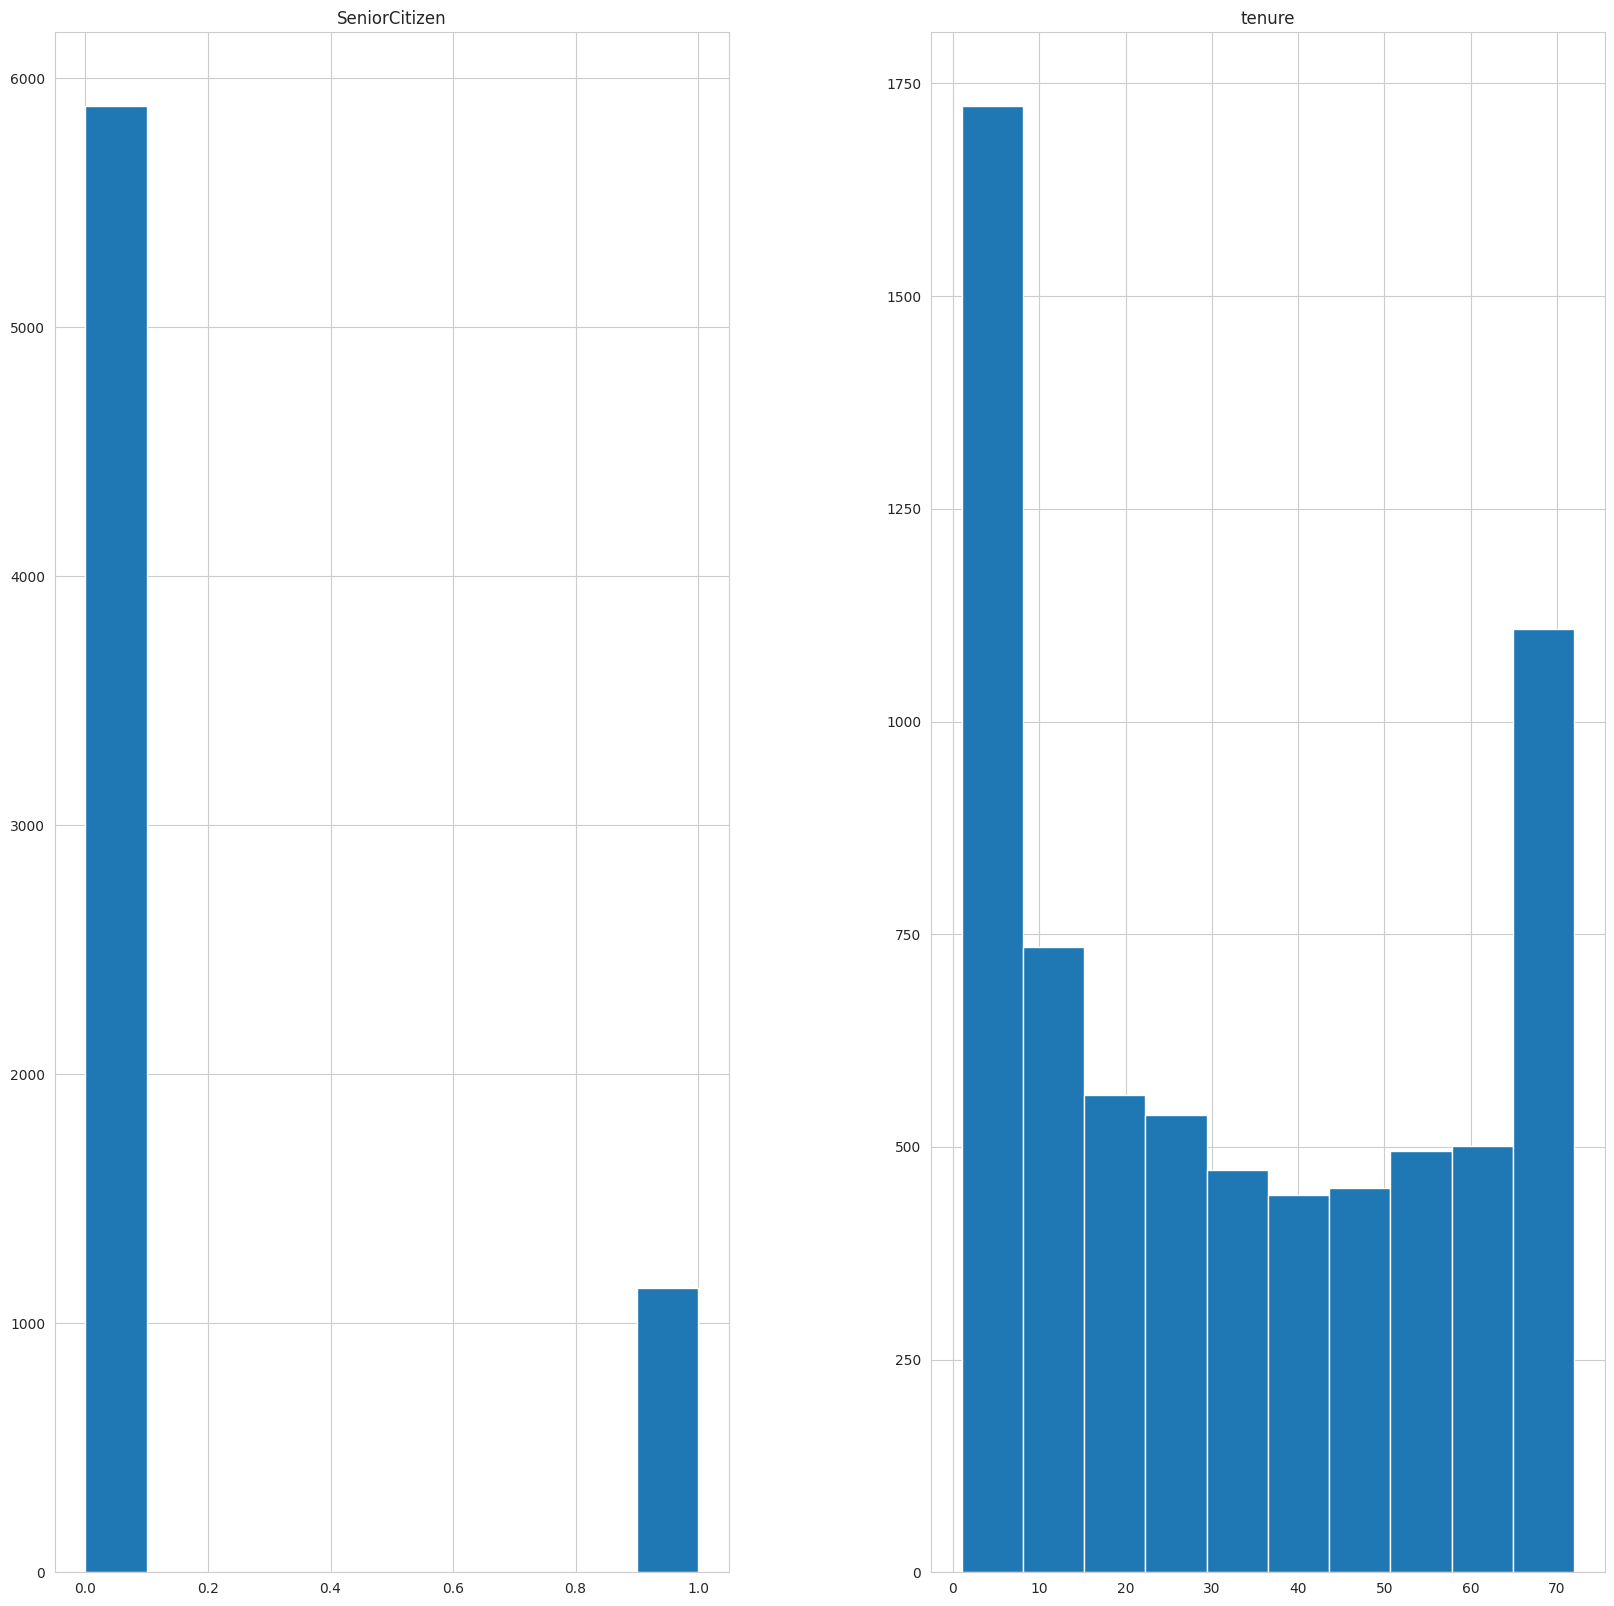

In [3]:
df.info()

columns_to_check = [
    'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'
]

# Calculate missing values for the specified columns
missing_info = pd.DataFrame({
    'Missing Values Count': df[columns_to_check].isnull().sum(),
})

print(missing_info)

# check unique values in each column
columns_to_check = [
    'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'
]

for column in columns_to_check:
    print(f"Unique values in '{column}':")
    print(df[column].unique())  # Show unique values in the column
    print(f"Number of unique values: {df[column].nunique()}\n")
# Visulazing the distibution of the data for every feature
df.hist(figsize=(20, 20));

## Data Cleaning

In [4]:
df['TotalCharges'] = df['TotalCharges'].str.replace('$', '', regex=False).astype(float)
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '').str.replace('/m', '').astype(float)


mean_by_internet_service = df.groupby('InternetService')['TotalCharges'].mean()

# Step 2: Function to impute missing values in 'totalcharges' based on the customer's 'internetservice'
def impute_missing(row):
    if pd.isnull(row['TotalCharges']):
        return mean_by_internet_service[row['InternetService']]
    return row['TotalCharges']

# Step 3: Apply the imputation function to the dataframe
df['TotalCharges'] = df.apply(impute_missing, axis=1)

df.head()

#customerID has 56 missing values --> drop rows

# Count the initial number of rows in the full dataset
initial_row_count = len(df)

# Drop rows with missing 'customerID'
df = df.dropna(subset=['customerID'])

# Count the number of rows after dropping
remaining_row_count = len(df)

# Calculate the number of removed rows
removed_rows = initial_row_count - remaining_row_count

# Print the number of removed rows
print(f'Number of removed rows: {removed_rows}')

# Print the number of rows remaining after dropping
print(f'Number of rows after dropping: {remaining_row_count}')



Number of removed rows: 56
Number of rows after dropping: 6976


## Exploratory Data Analysis

\**Q1: What are the most correlated attributes with customer churn?**

---



**Visualization**

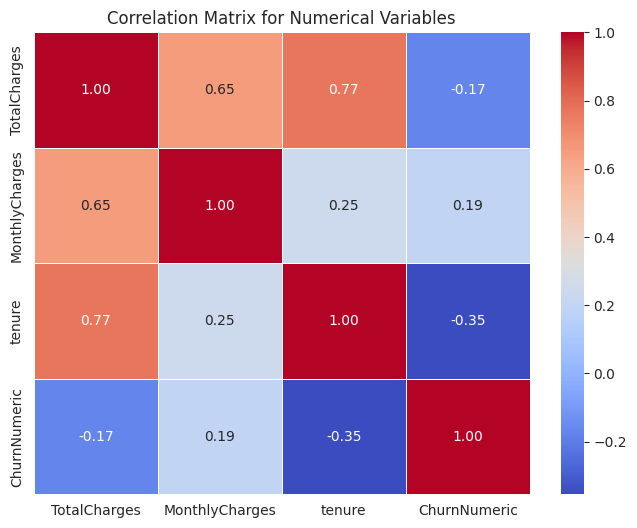

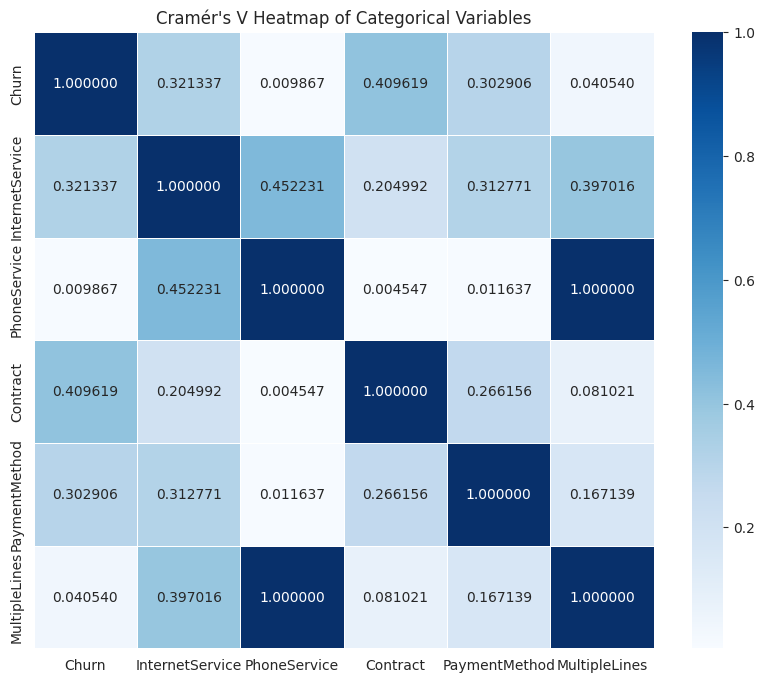

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame and 'Churn' is the target variable

# Step 1: Chi-Squared Test for Categorical Variables
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Create a Chi-Squared test function
def chi_squared_test(df, categorical_cols):
    chi_squared_results = {}

    for col in categorical_cols:
        if col != 'Churn':  # We don't test Churn itself
            contingency_table = pd.crosstab(df[col], df['Churn'])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            chi_squared_results[col] = p  # Store p-value for each attribute

    # Return results sorted by p-value
    return pd.Series(chi_squared_results).sort_values()

# Run Chi-Squared test
chi_results = chi_squared_test(df, categorical_cols)

# Convert 'Churn' from 'Yes'/'No' to 1/0
df['ChurnNumeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Step 2: Correlation Matrix for Numerical Variables (e.g., TotalCharges)
numerical_cols = ['TotalCharges', 'MonthlyCharges', 'tenure', 'ChurnNumeric']  # Add more numerical columns if needed

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Function to compute Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]  # Chi-square statistic
    n = confusion_matrix.sum().sum()  # Total number of observations
    r, k = confusion_matrix.shape  # Number of rows and columns
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))  # Cramér's V calculation

# List of categorical columns you want to calculate correlations for
categorical_columns = ['Churn', 'InternetService', 'PhoneService', 'Contract', 'PaymentMethod', 'MultipleLines']

# Create an empty dataframe to store Cramér's V values
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                                index=categorical_columns, columns=categorical_columns)

# Calculate Cramér's V between each pair of categorical columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  # Same column correlation is 1
        else:
            confusion_matrix = pd.crosstab(df[col1], df[col2])  # Create confusion matrix
            cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)  # Compute Cramér's V

# Plot a heatmap of Cramér's V correlations
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="Blues", fmt=".6f", linewidths=0.5)
plt.title("Cramér's V Heatmap of Categorical Variables")
plt.show()


**Answer for Q1**: Your answer here



```
# This is formatted as code
```

**Q2: Which payment method has the highest churn rate?**

**Visualization**

Churn Rate by Payment Method (% of churned customers):
PaymentMethod
Electronic check             57.250674
Mailed check                 16.549865
Bank transfer (automatic)    13.854447
Credit card (automatic)      12.345013
Name: proportion, dtype: float64


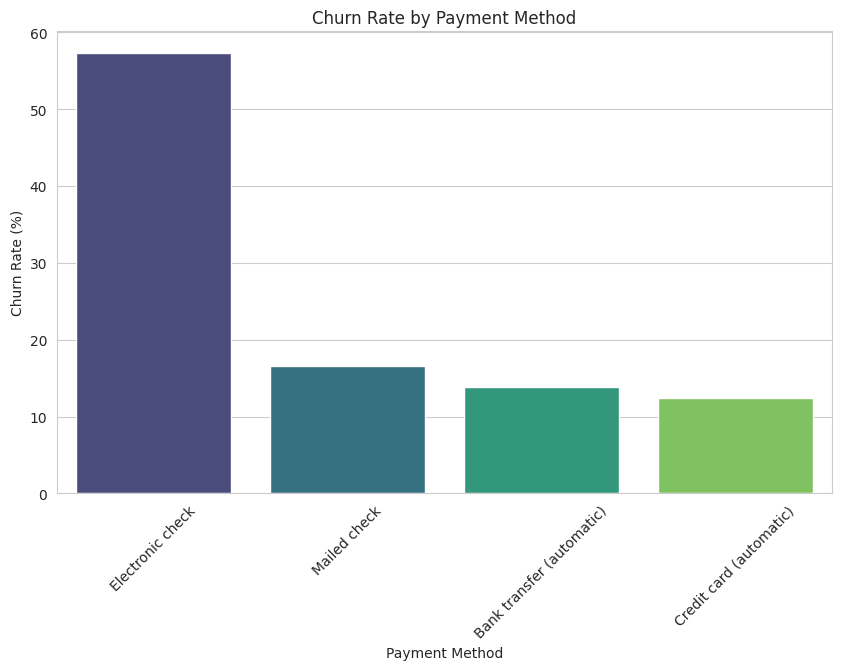

In [6]:
# Filter data to only include churned customers (Churn = "Yes")
churned_customers = df[df['Churn'] == 'Yes']

# Calculate churn rate for each payment method
churn_rate_by_payment = churned_customers['PaymentMethod'].value_counts(normalize=True) * 100

# Sort the results to find the payment method with the highest churn rate
churn_rate_by_payment = churn_rate_by_payment.sort_values(ascending=False)

# Display the result
print("Churn Rate by Payment Method (% of churned customers):")
print(churn_rate_by_payment)

# Plot the churn rate by payment method for better visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_payment.index, y=churn_rate_by_payment.values, hue=churn_rate_by_payment.index, palette="viridis", dodge=False)
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=45)
plt.show()


**Answer for Q2**: Electronic check

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)




Number of churned customers for each tenure value:
tenure
1     376
2     123
3      93
4      83
5      64
     ... 
68      9
69      8
70     11
71      6
72      6
Name: count, Length: 72, dtype: int64


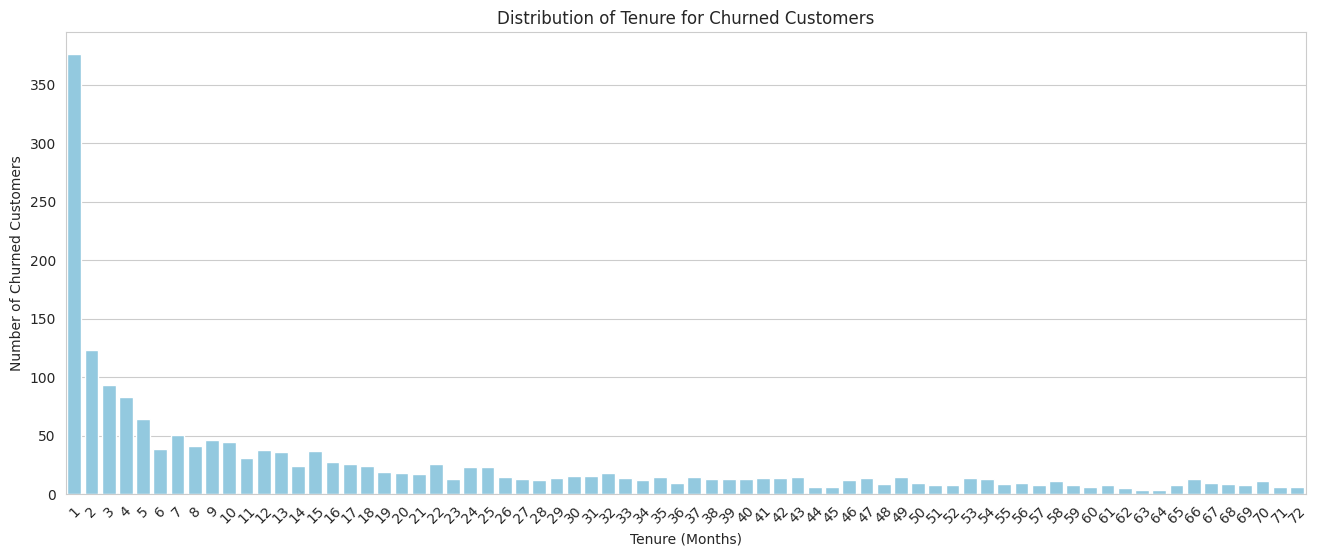

The most common tenure at which customers churn is: 1 months.


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter the DataFrame to include only customers who churned
churned_customers = df[df['Churn'] == "Yes"]

# Step 2: Group by 'tenure' and count the occurrences for each tenure value
churn_by_tenure = churned_customers['tenure'].value_counts().sort_index()
# Print the number of churned customers for each tenure
print("Number of churned customers for each tenure value:")
print(churn_by_tenure)

# Step 3: Plot the distribution of churned customers by tenure
plt.figure(figsize=(16, 6))
sns.barplot(x=churn_by_tenure.index, y=churn_by_tenure.values, color='skyblue')
plt.title('Distribution of Tenure for Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=45)
plt.show()

# Identify the tenure with the maximum churn count
most_common_tenure = churn_by_tenure.idxmax()
print(f"The most common tenure at which customers churn is: {most_common_tenure} months.")


**Answer for Q3**: 1 month

## Data Preparation for Modelling

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Step 1: Drop unimportant variables based on correlation and domain knowledge
df = df.drop(columns=['customerID', 'PhoneService', 'MultipleLines', 'TotalCharges','Churn'])

# Step 2: Normalize the continuous variables (Tenure, MonthlyCharges)
scaler = MinMaxScaler()

# We only normalize the numerical columns that are relevant for the model
df[['tenure', 'MonthlyCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges']])

# Step 3: Define categorical features
# Ordinal variables: Features with a natural order
ordinal_features = ['Contract']  # Based on your specific order for 'Contract'

# Nominal variables: Features without a natural order
nominal_features = ['gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']  # Removed PhoneService and MultipleLines

# Step 4: Apply custom encoding for 'Contract' (Ordinal feature)
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df['Contract'] = df['Contract'].map(contract_mapping)

# Step 5: Label encoding for other ordinal features (if applicable)
for col in ordinal_features:
    df[col] = df[col].astype('category').cat.codes

# Step 6: One-Hot Encoding for nominal features
df = pd.get_dummies(df, columns=nominal_features, drop_first=False)
# List the columns that are boolean (from one-hot encoding)
encoded_columns = ['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
                   'Dependents_No', 'Dependents_Yes', 'InternetService_DSL',
                   'InternetService_Fiber optic', 'InternetService_No',
                   'OnlineSecurity_No', 'OnlineSecurity_No internet service',
                   'OnlineSecurity_Yes', 'OnlineBackup_No',
                   'OnlineBackup_No internet service', 'OnlineBackup_Yes',
                   'DeviceProtection_No', 'DeviceProtection_No internet service',
                   'DeviceProtection_Yes', 'TechSupport_No',
                   'TechSupport_No internet service', 'TechSupport_Yes',
                   'StreamingTV_No', 'StreamingTV_No internet service',
                   'StreamingTV_Yes', 'StreamingMovies_No',
                   'StreamingMovies_No internet service', 'StreamingMovies_Yes',
                   'PaperlessBilling_No', 'PaperlessBilling_Yes',
                   'PaymentMethod_Bank transfer (automatic)',
                   'PaymentMethod_Credit card (automatic)',
                   'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# Convert only the encoded boolean columns to integers (0 and 1)
df[encoded_columns] = df[encoded_columns].astype('int')

# Check the DataFrame info after conversion
df.info()

# Display the first few rows to confirm the changes
df.head()


# Check the DataFrame info to see the changes
df.info()

# Now df has categorical variables encoded properly for the model.

# Display the first few rows of the dataframe after processing
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 6976 entries, 0 to 7031
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            6976 non-null   int64  
 1   tenure                                   6976 non-null   float64
 2   Contract                                 6976 non-null   int8   
 3   MonthlyCharges                           6976 non-null   float64
 4   ChurnNumeric                             6976 non-null   int64  
 5   gender_Female                            6976 non-null   int64  
 6   gender_Male                              6976 non-null   int64  
 7   Partner_No                               6976 non-null   int64  
 8   Partner_Yes                              6976 non-null   int64  
 9   Dependents_No                            6976 non-null   int64  
 10  Dependents_Yes                           6976 non-nul

,SeniorCitizen,tenure,Contract,MonthlyCharges,ChurnNumeric,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0,0.115423,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,0.464789,1,0.385075,0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0.014085,0,0.354229,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0.619718,1,0.239303,0,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0.014085,0,0.521891,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Modelling

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Step 1: Split the data into training and testing sets
X = df.drop(columns=['ChurnNumeric'])  # Drop target columns
y = df['ChurnNumeric']  # Churn target variable

# Split the data: 80% train, 20% test (you can adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize and train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)




DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [10]:
#This code works on google colab
# First, install the graphviz package
!pip install graphviz

import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['Churn', 'No Churn'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)
graph

## Evaluation

Train Result:
Accuracy Score: 99.71%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.996335     0.999328  0.997133     0.997831      0.997140
recall        0.999755     0.990007  0.997133     0.994881      0.997133
f1-score      0.998042     0.994645  0.997133     0.996344      0.997128
support    4079.000000  1501.000000  0.997133  5580.000000   5580.000000
_______________________________________________
Confusion Matrix: 
 [[4078    1]
 [  15 1486]]

Test Result:
Accuracy Score: 75.00%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.829060    0.507289      0.75     0.668174      0.747465
recall        0.837812    0.491525      0.75     0.664669      0.750000
f1-score      0.833413    0.499283      0.75     0.666348      0.748684
support    1042.000000  354.000000  

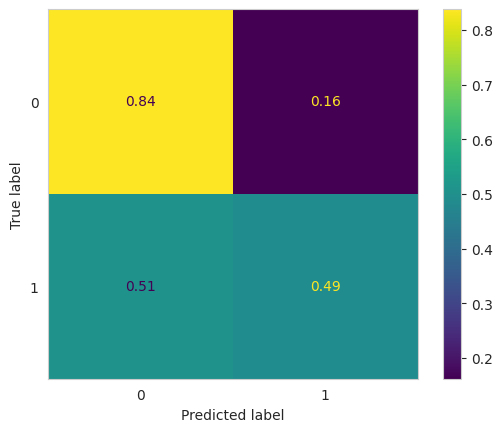

Precision:  0.5072886297376094
Recall:  0.4915254237288136
F1_score:  0.49928263988522237


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Function to print accuracy, confusion matrix, and classification report
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    else:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

        # Display confusion matrix as a plot
        cm = confusion_matrix(y_test, pred, labels=clf.classes_, normalize='true')
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
        disp.plot()
        plt.grid(False)
        plt.show()

# Assuming 'tree_clf' is your trained decision tree classifier, and 'X_train', 'y_train', 'X_test', 'y_test' are your data
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)  # Evaluate on training data
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)  # Evaluate on test data

# Additional metrics
pred = tree_clf.predict(X_test)

print('Precision: ', precision_score(y_test, pred))
print('=======================================')
print('Recall: ', recall_score(y_test, pred))
print('=======================================')
print('F1_score: ', f1_score(y_test, pred))


Cross Validation

F1-Score for each fold: [0.49902913 0.49848638 0.49659202]
Average F1-Score: 0.50 (+/- 0.00)
Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Train Result:
Accuracy Score: 76.42%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.854868     0.554831  0.764158     0.704849      0.774159
recall        0.815886     0.623584  0.764158     0.719735      0.764158
f1-score      0.834922     0.587202  0.764158     0.711062      0.768286
support    4079.000000  1501.000000  0.764158  5580.000000   5580.000000
_______________________________________________
Confusion Matrix: 
 [[3328  751]
 [ 565  936]]

Test Result:
Accuracy Score: 75.36%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  acc

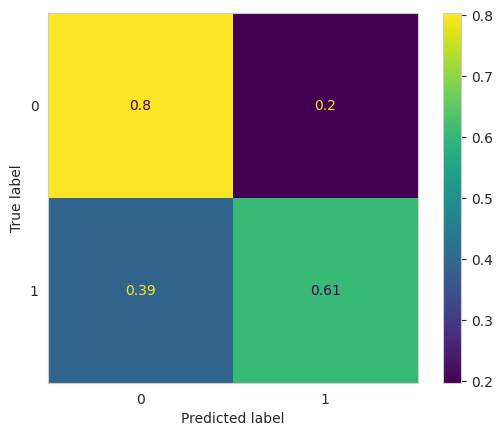

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, recall_score
import numpy as np

# Stratified K-Fold Cross-Validation
clf = DecisionTreeClassifier(random_state=42)

# Define StratifiedKFold with 3 splits
skf = StratifiedKFold(n_splits=3)

# Perform Stratified K-Fold Cross-Validation using F1-score as the metric
scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='f1')

# Display the results of cross-validation
print(f"F1-Score for each fold: {scores}")
print(f"Average F1-Score: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

# Hyperparameter Tuning using GridSearchCV
# Define the parameter grid to search over
params = {
    "criterion": ["gini", "entropy"],                         # 2 options
    "splitter": ["best", "random"],                           # 2 options
    "max_depth": list(range(1, 21)),                           # 20 options (1 to 20)
    "min_samples_split": [2, 3, 4,5,6],               # 7 options
    "min_samples_leaf": [1, 2, 3, 4, 5],                # 7 options
}


# Initialize GridSearchCV to find the best hyperparameters based on recall score
tree_cv = GridSearchCV(estimator=clf, param_grid=params, scoring='recall', n_jobs=-1, cv=3, verbose=1)

# Fit the grid search
tree_cv.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = tree_cv.best_params_
print(f"Best hyperparameters: {best_params}")

# Train a new model using the best parameters
tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

# Evaluate the model on both the training and test sets
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)


## Bonus (Optional)